In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from mf import MatrixFactorization
import scipy.sparse
%matplotlib inline

In [2]:
def recall_at_k(k: int, scores: np.ndarray, actual: np.ndarray):
    ind = np.argsort(scores)[::-1][:k]
    return actual[ind].sum() / actual.sum()

def precision_at_k(k: int, scores: np.ndarray, actual: np.ndarray):
    ind = np.argsort(scores)[::-1][:k]
    return actual[ind].sum() / k

def ndcg_at_k(k: int, scores: np.ndarray, actual: np.ndarray):
    ind = np.argsort(scores)[:k:-1]
    rel = actual[ind]
    dcg = 0
    for i in range(len(rel)):
        dcg += rel[i] / np.log2(i + 1 + 1)
    rec_set = np.sort(rel)[::-1]
    idcg = 0
    for i in range(len(rec_set)):
        idcg += rec_set[i] / np.log2(i + 1 + 1)
    return dcg / idcg


In [3]:
x = scipy.sparse.load_npz('./data/train.npz')
y = scipy.sparse.load_npz('./data/test.npz')

  0%|          | 0/500 [00:00<?, ?it/s]

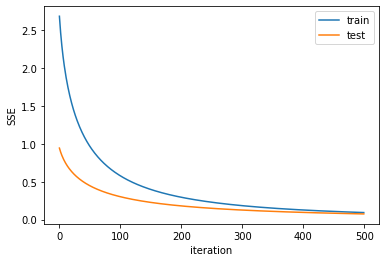

In [4]:
M = MatrixFactorization(K=100, iterations=500)
e_train, e_test = M.train(x, y, leave_pbar=True)
plt.plot(e_train, label="train")
plt.plot(e_test, label="test")
plt.xlabel("iteration")
plt.ylabel("SSE")
plt.legend()
plt.show()

In [5]:
y_array = y.toarray()

recall_scores = []
ndcg_scores = []

for i in tqdm(range(y.shape[0])):
    scores = M.recommend(k=10, user=i)
    recall_scores.append(recall_at_k(k=10, scores=scores, actual=y_array[i]))
    # ndcg_scores.append(ndcg_at_k(k=10, scores=scores, actual=y[i]))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 66726/66726 [20:30<00:00, 54.23it/s]


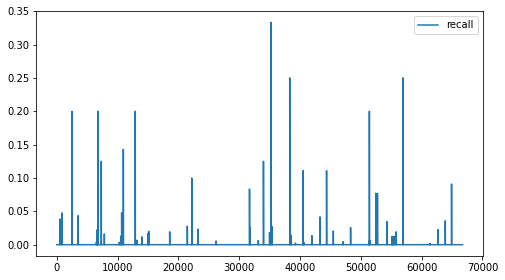

In [6]:
plt.figure(figsize=(8, 4.5))
plt.plot(recall_scores, label="recall")
plt.legend()
plt.show()

In [7]:
np.mean(recall_scores)

5.135934641004798e-05